In [5]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 33.0 MB/s eta 0:00:00


**Modifying data in-place**

Many of MNE-Python's data objects(Raw, Epochs, Evoked, etc.) have methods that modify the data in-place (either optionally or obligatorily). This can be advantageous when working with large datasets because it reduces the amount of computer memory needed to perform the computations. However, it can lead to unexpected results if you're not aware that it's happening.



In [6]:
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_raw.fif')
# the preload flag loads the data into memory now
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw.crop(tmax=10.)  # raw.crop() always happens in-place


Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 447GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 6007 (10.0 s), ~20.5 MB, data loaded>

**Signal Processing**

Most MNE-Python data objects have built-in methods for filtering, including high,low and band-pass filters(filter), band-stop filters (notch_filter), Hilbert transforms (apply_hilbert), and even arbitrary or user-defined functions (apply_function). These typically always modify data in-place, so if we want to preserve the unprocessed data for comparison, we must first make a copy of it. For example:

In [7]:
original_raw = raw.copy()
raw.apply_hilbert()
print(f'original data type was {original_raw.get_data().dtype}, after '
      f'apply_hilbert the data type changed to {raw.get_data().dtype}.')

original data type was float64, after apply_hilbert the data type changed to complex128.


**Channel Type**

Another group of methods where data is modified in-place are the channel-picking methods. For example:

In [8]:
print(f'original data had {original_raw.info["nchan"]} channels.')
original_raw.pick('eeg') #select only the EEG channels
print(f'after picking it has {original_raw.info["nchan"]} channels.')

original data had 376 channels.
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
after picking it has 60 channels.


The copy parameter

Above we saw an example of using the copy method to facilitate comparing data before and after processing. This is not needed when using certain MNE-Python functions, because they have a function parameter where you can specify copy=True (return a modified copy of the data) or copy=False (operate in-place). For example, mne.set_eeg_reference is one such function; notice that here we plot original_raw after the rereferencing has been done, but original_raw is unaffected because we specified copy=True:

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Using matplotlib as 2D backend.


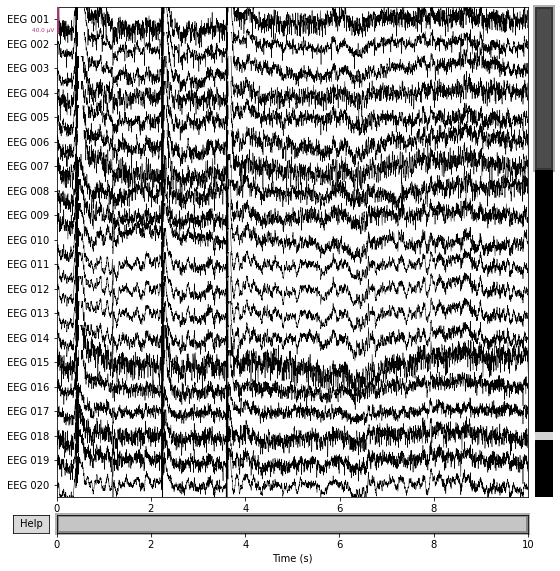

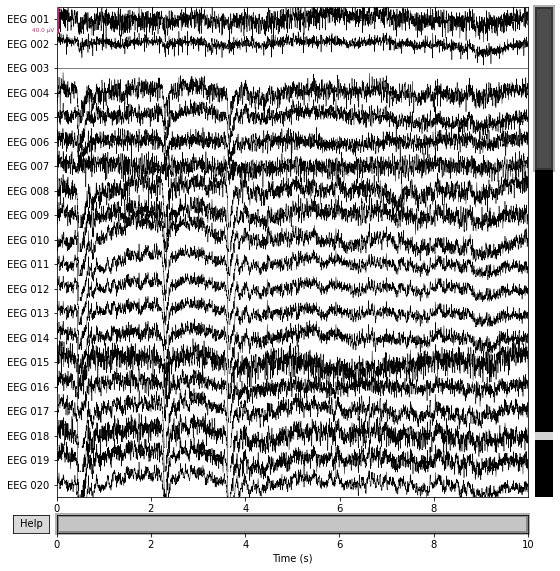

In [9]:
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ['EEG 003'],
                                                   copy=True)
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()

Summary

Generally speaking, you should expect that methods of data objects will operate in-place, and functions that take a data object as a parameter will operate on a copy of the data (unless the function has a copy parameter and it defaults to False or you specify copy=False). During the exploratory phase of your analysis, where you might want to try out the effects of different data cleaning approaches, you should get used to patterns like raw.copy().filter(...).plot() or raw.copy().apply_proj().plot_psd() if you want to avoid having to re-load data and repeat earlier steps each time you change a computation (see the In-place operation section for more info on method chaining).

